# Data Preparation

In this section, we will prepare the data for training our neural network. More specifically, we will perform the following operations for both the training and test sets:
1. Split the data into training and testing sets
2. Look for missing values
3. Perform one-hot encoding on the categorical features
4. Normalize the data



In [1]:
import numpy as np
import pandas as pd

#file link
file_link = 'https://drive.google.com/file/d/15V2Xx7leO57hwXji0ySNKWDXtwr4pWfn/view?usp=sharing'

file_id = file_link.split('/')[-2]

download_link = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv(download_link)

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0



The dataset contains 9 columns, 8 features and 1 target variable. The features represent the health status of a patient.
 The target variable is a binary variable, that is, it can take only two values: 0 or 1. The value 0 means that the patient does not have diabetes, while the value 1 means that the patient has diabetes.
  

## Splitting the data into training and testing sets

One crucial step in building and evaluating machine learning models is to split the dataset into training and testing sets. We'll use the training set to train our model and the testing set to evaluate the performance of our model. 

In real-world scenarios, the testing data is typically not available during the model development phase. Therefore, we simulate this situation by temporarily setting aside a portion of the data for testing purposes, allowing us to manage and assess the model's performance as if the testing data were unknown.

Note: sklearn's train_test_split function does not perform stratified sampling directly, indeed you need to specify the stratify parameter.
 Stratify sampling is a sampling technique that ensures that the training and testing sets have approximately the same percentage of samples of each target class as the original dataset. This technique is useful when the dataset is imbalance. 
 
More information on: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [2]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, :8], data["diabetes"]

X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train_80)
print(y_train_80)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
74736  Female  80.0             1              0          former  27.32   
36589  Female  19.0             0              0           never  25.18   
37414  Female  36.0             0              0         No Info  25.95   
71251  Female  35.0             0              0         current  23.43   
40454  Female  30.0             0              0         No Info  22.62   
...       ...   ...           ...            ...             ...    ...   
17083  Female  39.0             0              0           never  32.28   
27250    Male  43.0             0              0           never  27.32   
33409  Female  52.0             1              0          former  27.32   
91639  Female   5.0             0              0         No Info  15.68   
80678    Male   4.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  
74736          6.5                  145  
36589          

In [3]:
X_train_80 = X_train_80.reset_index(drop=True)
y_train_80 = y_train_80.reset_index(drop=True)
X_test_20 = X_test_20.reset_index(drop=True)
y_test_20 = y_test_20.reset_index(drop=True)

In [4]:
X_train_80.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,1,0,former,27.32,6.5,145
1,Female,19.0,0,0,never,25.18,4.5,126
2,Female,36.0,0,0,No Info,25.95,6.6,200
3,Female,35.0,0,0,current,23.43,6.0,159
4,Female,30.0,0,0,No Info,22.62,5.0,90


In [5]:
y_train_80.head()

0    1
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [6]:
X_test_20.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,36.0,0,0,former,22.64,6.0,160
1,Female,31.0,0,0,never,27.32,5.8,126
2,Male,52.0,0,0,not current,23.20,4.0,100
3,Female,29.0,0,0,never,30.57,5.0,160
4,Male,61.0,0,0,never,26.88,5.8,90


In [7]:
y_test_20.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

# Train set preparation

## Missing Values
First of all, we've to get some basic information about the data.

In [8]:
X_train_80.info()
y_train_80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               80000 non-null  object 
 1   age                  80000 non-null  float64
 2   hypertension         80000 non-null  int64  
 3   heart_disease        80000 non-null  int64  
 4   smoking_history      80000 non-null  object 
 5   bmi                  80000 non-null  float64
 6   HbA1c_level          80000 non-null  float64
 7   blood_glucose_level  80000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 4.9+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 80000 entries, 0 to 79999
Series name: diabetes
Non-Null Count  Dtype
--------------  -----
80000 non-null  int64
dtypes: int64(1)
memory usage: 625.1 KB


Now, we know that there aren't any missing values or null values in the data. So, we can proceed to the next step and view the statistical information about the data.

## One-Hot Encoding
Let's see how many categorical features we have in the data.

In [9]:
X_train_80.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4113
HbA1c_level              18
blood_glucose_level      18
dtype: int64

We can say that we have probably 2 categorical features. We don't need an Euristic to decide if a feature is a categorical feature or not. We can use the dtypes attribute of the DataFrame to get the data type of each column. If the data type is numerical, then the feature is not a categorical feature. Otherwise, it is a categorical feature.
 
Notice that we can do that only because this dataset give us the information about the data type of each column, it's not always the case.

In [10]:

# is_numerical is a Series that contains True if the data type of the corresponding column is numerical, False otherwise
is_numerical = data.dtypes.apply(lambda x: np.issubdtype(x, np.number))

# Notice that since we work with a dataset that is not indexed with an index, we can use the columns attribute of the DataFrame to get the columns names.
categorical_cols = data.columns[~is_numerical]

categorical_cols

Index(['gender', 'smoking_history'], dtype='object')


How to manage the categorical feature? We'll use one-hot encoding to manage the categorical feature.

The implementation force us to convert the categorical feature into numerical feature. We've seen before that we have 2 categorical features. So, we'll use one-hot encoding to convert the categorical features into numerical features, thus increasing the number of columns from 9 to 16. Now, we can use the get_dummies function of pandas to perform one-hot encoding on the categorical features, that is more coince than the one-hot encoding that sklearn provides.

In [11]:
import pandas as pd

# Create a DataFrame with only the categorical features, using one-hot encoding, we force the data type to be int
encoded_df = pd.get_dummies(X_train_80[categorical_cols], prefix=categorical_cols, dtype=int)

# Delete the categorical features from the original DataFrame
X_train_80 = X_train_80.drop(columns=categorical_cols)

# Union the two DataFrames
X_train_80 = pd.concat([X_train_80, encoded_df], axis=1)



In [12]:
X_train_80.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,1,0,27.32,6.5,145,1,0,0,0,0,0,1,0,0
1,19.0,0,0,25.18,4.5,126,1,0,0,0,0,0,0,1,0
2,36.0,0,0,25.95,6.6,200,1,0,0,1,0,0,0,0,0
3,35.0,0,0,23.43,6.0,159,1,0,0,0,1,0,0,0,0
4,30.0,0,0,22.62,5.0,90,1,0,0,1,0,0,0,0,0



In the context of using a neural network, normalizing or standardizing data is essential. When we perform one-hot encoding for categorical variables, converting them into binary columns, we are essentially creating numerical features. While the primary purpose of standardization is to bring numerical features to a consistent scale, applying it to binary columns ensures uniformity in the treatment of all features. This step helps maintain overall consistency and aids in effective training of the neural network.

## Statistical Information
Let's see the statistical information about the data.

In [13]:
X_train_80.describe().T

y_train_80.describe().T


count    80000.000000
mean         0.085000
std          0.278883
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diabetes, dtype: float64

We can see that the at least 75% of the data is 0. So, we can say that the dataset is imbalanced. We'll deal with this problem later.

### Plotting the data distribution

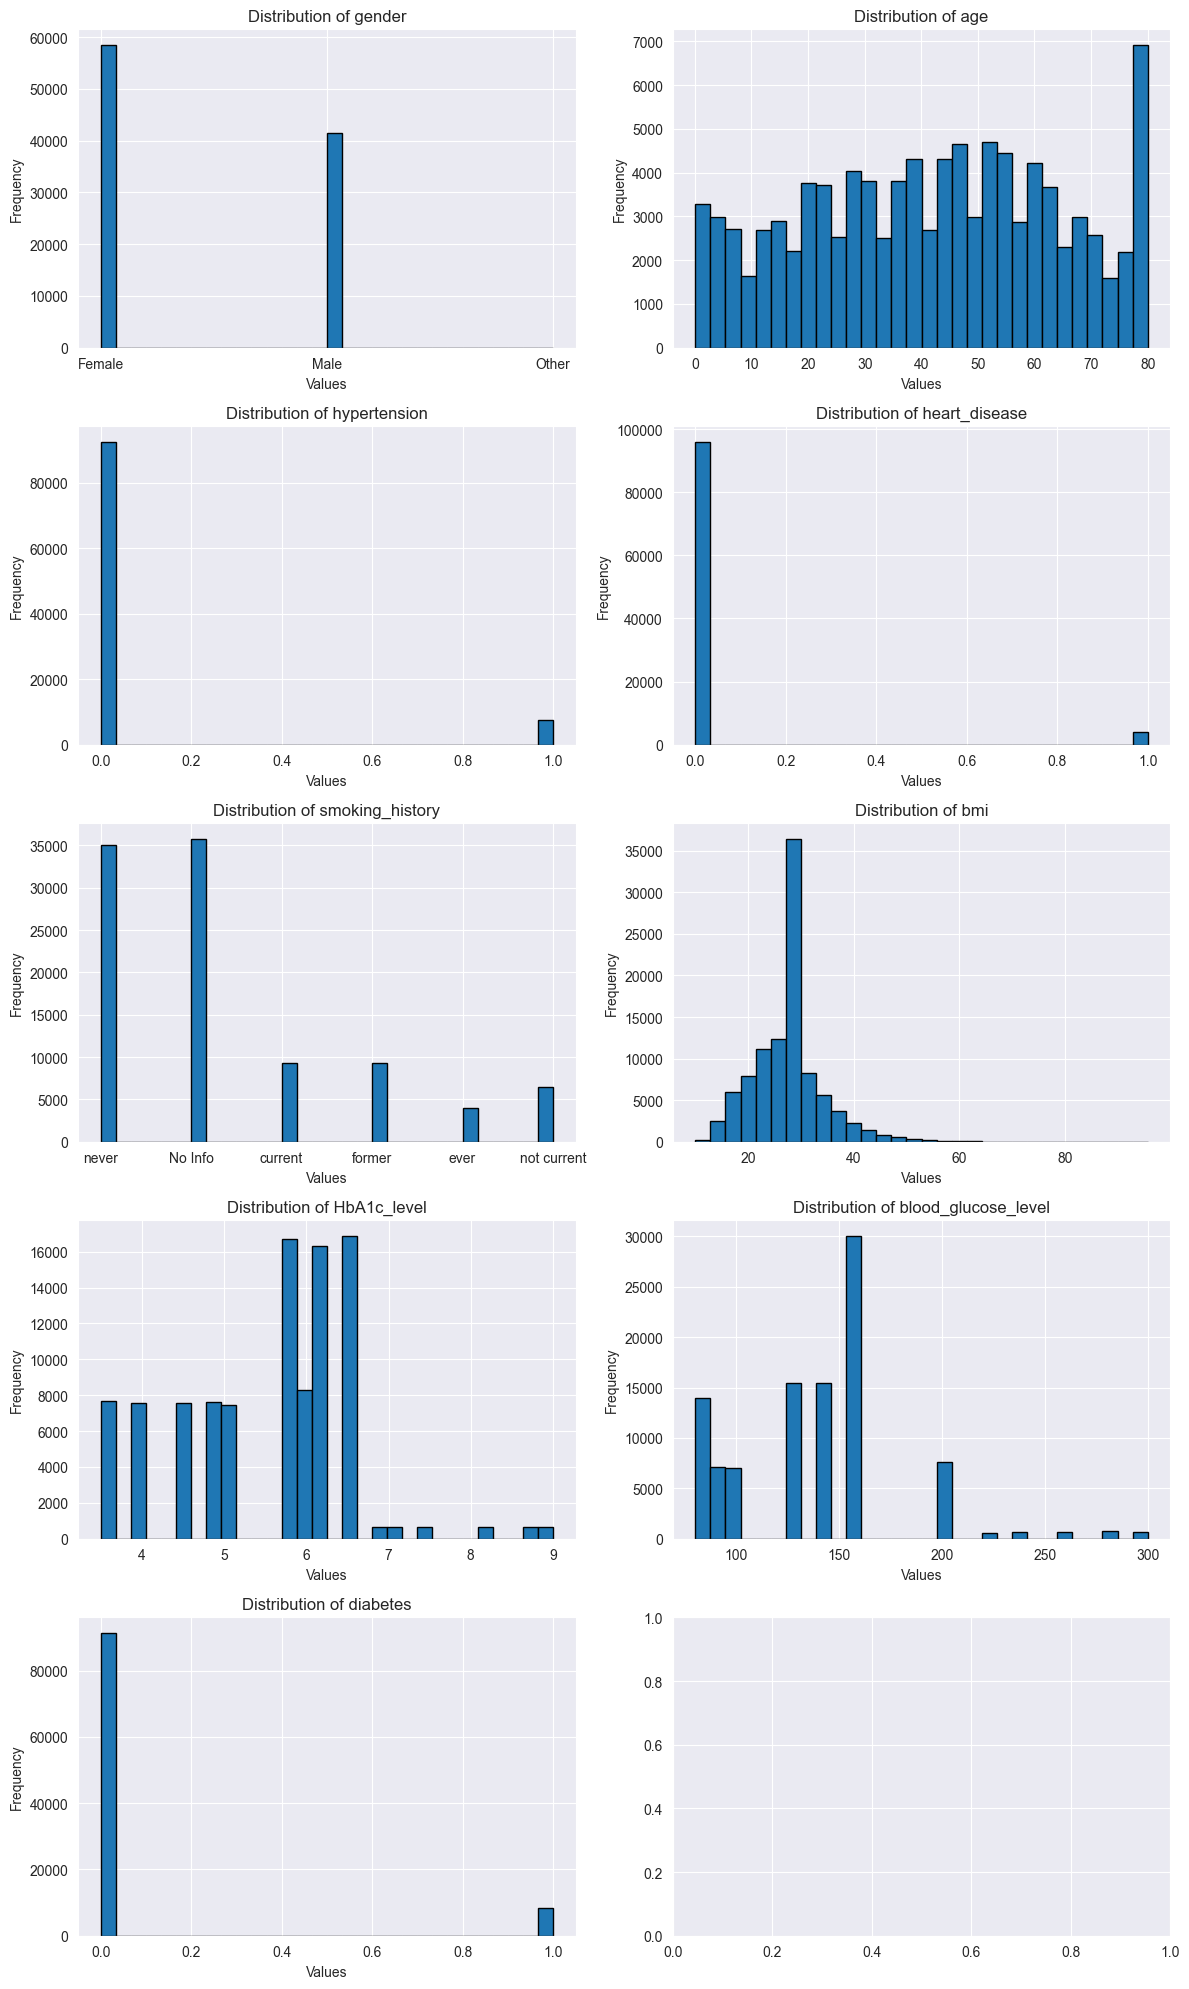

In [14]:
import matplotlib.pyplot as plt

# Compute the number of rows and columns needed to plot each variable in the dataset
num_rows = (len(data.columns) + 1) // 2  # Number of rows (2 variables per row)
num_cols = 2  # Number of columns (2 variables per column)

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Iterate over the columns of the dataset and plot each variable
for i, column in enumerate(data.columns):
    ax = axes[i // num_cols, i % num_cols]
    data[column].hist(bins=30, edgecolor='black', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Adjust the space between the subplots
plt.tight_layout()

# Show the plot
plt.show()


### Normalization(Scaling Normalization) or Standardization(Z- Score Normalization)
In general if we don't know the distribution of the data, it's useful to use the Scaling Normalization. Otherwise, if we know that the data is normally distributed, we can use the Z-Score Normalization.

More info on: https://www.geeksforgeeks.org/normalization-vs-standardization/


## Normalization (Min-Max Scaling)
Why we use normalization? We use normalization to scale the data in a range. In this way, we can avoid that some features have a greater impact on the model than other features. We can use the MinMaxScaler class of sklearn to normalize the data.

![normalization](images/normalization.png)

Image credit: https://towardsdatascience.com/how-to-calculate-the-mean-and-standard-deviation-normalizing-datasets-in-pytorch-704bd7d05f4c

Theoretically speaking, if we normalize the data, our model will converge faster.

So, we can say that normalization is not always necessary. However, it is always a good practice to normalize the data.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Create an instance of the MinMaxScaler class, that will be used to normalize the test set as well later
X_train_80 = pd.DataFrame(scaler.fit_transform(X_train_80), columns=X_train_80.columns)
# Note: we don't need to normalize the target variable, because it is already normalized (it is a binary variable)

X_train_80.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,1.0,0.0,0.202031,0.545455,0.295455,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.236737,0.0,0.0,0.177054,0.181818,0.209091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.449449,0.0,0.0,0.186041,0.563636,0.545455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.436937,0.0,0.0,0.156629,0.454545,0.359091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.374374,0.0,0.0,0.147176,0.272727,0.045455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Plotting the data distribution

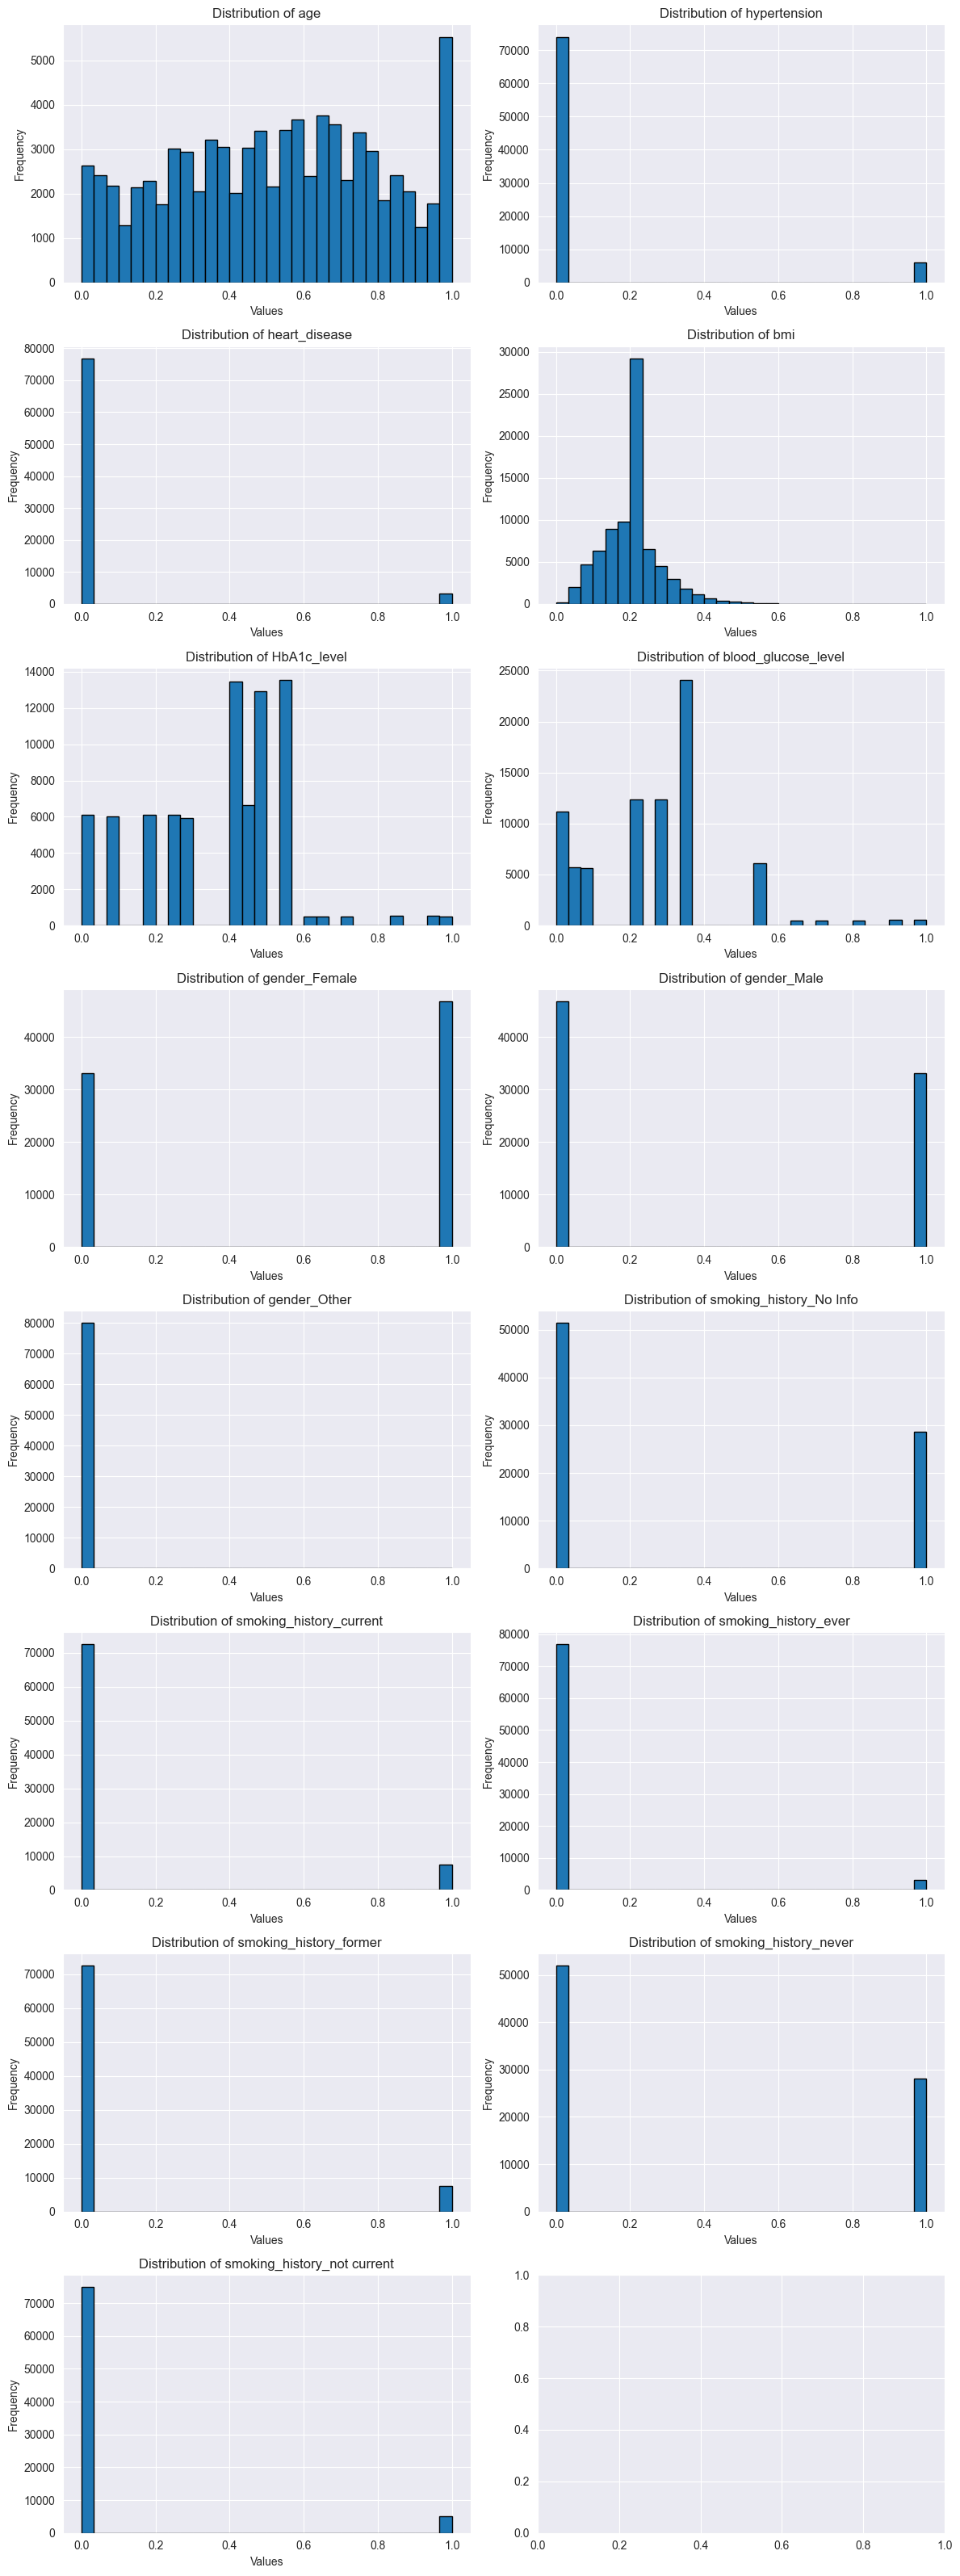

In [16]:
import matplotlib.pyplot as plt

# Compute the number of rows and columns needed to plot each variable in the dataset
num_rows = (len(X_train_80.columns) + 1) // 2  # Number of rows (2 variables per row)
num_cols = 2  # Number of columns (2 variables per column)

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Iterate over the columns of the dataset and plot each variable
for i, column in enumerate(X_train_80.columns):
    ax = axes[i // num_cols, i % num_cols]
    X_train_80[column].hist(bins=30, edgecolor='black', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Adjust the space between the subplots
plt.tight_layout()

# Show the plot
plt.show()


## Saving the data

In [17]:
import pickleshare
%store X_train_80
%store y_train_80


Stored 'X_train_80' (DataFrame)
Stored 'y_train_80' (Series)


# Test set preparation
Similary how we prepared the training set, we need to prepare the test set as well. We need to perform the same operations that we performed on the training set. So, we need to perform one-hot encoding and normalization on the test set as well.

## Missing Values

In [18]:
X_test_20.info()
y_test_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               20000 non-null  object 
 1   age                  20000 non-null  float64
 2   hypertension         20000 non-null  int64  
 3   heart_disease        20000 non-null  int64  
 4   smoking_history      20000 non-null  object 
 5   bmi                  20000 non-null  float64
 6   HbA1c_level          20000 non-null  float64
 7   blood_glucose_level  20000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.2+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: diabetes
Non-Null Count  Dtype
--------------  -----
20000 non-null  int64
dtypes: int64(1)
memory usage: 156.4 KB


We can see that there aren't any missing values or null values in the data.

## One-Hot Encoding

In [19]:
X_test_20.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    3160
HbA1c_level              18
blood_glucose_level      18
dtype: int64

In [20]:
is_numerical = data.dtypes.apply(lambda x: np.issubdtype(x, np.number))

categorical_cols = data.columns[~is_numerical]

categorical_cols


Index(['gender', 'smoking_history'], dtype='object')

In [21]:

encoded_df = pd.get_dummies(X_test_20[categorical_cols], prefix=categorical_cols, dtype=int)

X_test_20 = X_test_20.drop(columns=categorical_cols)

X_test_20 = pd.concat([X_test_20, encoded_df], axis=1)



### Verifying allignment between training and test sets
We have to verify that the training and test sets have the same columns. If they don't have the same columns, we can't use the test set to evaluate the performance of our model. Since we have a small dataset, we could just look at the columns of the two DataFrames. However, we'll use a more general approach that can be used with any dataset.

In [22]:
# Get the names of the columns from the DataFrame of training
features_train = set(X_train_80.columns)

# Get the names of the columns from the DataFrame of test
features_test = set(X_test_20.columns)

# Check if the two sets of columns are the same
if features_train == features_test:
    print("The columns are aligned correctly") 
else:
    print("The columns are not aligned correctly") 
    # Print the differences between the two sets of columns
    print("Differenze tra le colonne:", features_train.symmetric_difference(features_test))

The columns are aligned correctly


In [23]:
X_test_20.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,36.0,0,0,22.64,6.0,160,1,0,0,0,0,0,1,0,0
1,31.0,0,0,27.32,5.8,126,1,0,0,0,0,0,0,1,0
2,52.0,0,0,23.20,4.0,100,0,1,0,0,0,0,0,0,1
3,29.0,0,0,30.57,5.0,160,1,0,0,0,0,0,0,1,0
4,61.0,0,0,26.88,5.8,90,0,1,0,0,0,0,0,1,0


In [24]:
X_train_80.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,1.0,0.0,0.202031,0.545455,0.295455,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.236737,0.0,0.0,0.177054,0.181818,0.209091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.449449,0.0,0.0,0.186041,0.563636,0.545455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.436937,0.0,0.0,0.156629,0.454545,0.359091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.374374,0.0,0.0,0.147176,0.272727,0.045455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Normalization (Min-Max Scaling)

In [25]:
X_test_20.describe().T

y_test_20.describe().T


count    20000.000000
mean         0.085000
std          0.278889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diabetes, dtype: float64

The data is not balanced. So, as we said before, we need to deal with this problem.

In [26]:
from sklearn.preprocessing import MinMaxScaler
X_test_20 = pd.DataFrame(scaler.transform(X_test_20), columns=X_test_20.columns)

X_test_20.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.449449,0.0,0.0,0.147409,0.454545,0.363636,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.386887,0.0,0.0,0.202031,0.418182,0.209091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.649650,0.0,0.0,0.153945,0.090909,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.361862,0.0,0.0,0.239963,0.272727,0.363636,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.762262,0.0,0.0,0.196895,0.418182,0.045455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Saving the data

In [27]:
import pickleshare
%store X_test_20
%store y_test_20

print(X_test_20)
print(y_test_20)


Stored 'X_test_20' (DataFrame)
Stored 'y_test_20' (Series)
            age  hypertension  heart_disease       bmi  HbA1c_level  \
0      0.449449           0.0            0.0  0.147409     0.454545   
1      0.386887           0.0            0.0  0.202031     0.418182   
2      0.649650           0.0            0.0  0.153945     0.090909   
3      0.361862           0.0            0.0  0.239963     0.272727   
4      0.762262           0.0            0.0  0.196895     0.418182   
...         ...           ...            ...       ...          ...   
19995  0.274274           0.0            0.0  0.120098     0.090909   
19996  0.474474           0.0            0.0  0.158613     0.000000   
19997  0.474474           0.0            0.0  0.193277     0.490909   
19998  0.974975           0.0            0.0  0.202031     0.418182   
19999  0.887387           0.0            0.0  0.227824     0.545455   

       blood_glucose_level  gender_Female  gender_Male  gender_Other  \
0               

# References
1. Dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data
2. https://towardsdatascience.com/how-to-calculate-the-mean-and-standard-deviation-normalizing-datasets-in-pytorch-704bd7d05f4c
3. https://www.geeksforgeeks.org/normalization-vs-standardization/
4. https://stats.stackexchange.com/questions/437840/in-machine-learning-how-does-normalization-help-in-convergence-of-gradient-desc